In [1]:
import numpy as np
import os,sys
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
x=[]
y=[]
for category in os.listdir('20_newsgroups/'):
    for document in os.listdir('20_newsgroups/'+category+'/'):
        with open('20_newsgroups/'+category+'/'+document,"rb")as f:
            x.append((document,f.read()))
            y.append(category)

In [7]:
x

[('75895',
  b'Newsgroups: talk.politics.mideast\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!brunix!doorknob!hm\nFrom: hm@cs.brown.edu (Harry Mamaysky)\nSubject: Heil Hernlem \nIn-Reply-To: hernlem@chess.ncsu.edu\'s message of Wed, 14 Apr 1993 12:58:13 GMT\nMessage-ID: <HM.93Apr15112701@yoda.cs.brown.edu>\nSender: news@cs.brown.edu\nOrganization: Dept. of Computer Science, Brown University\nReferences: <1993Apr14.125813.21737@ncsu.edu>\nDate: Thu, 15 Apr 1993 16:27:01 GMT\nLines: 24\n\nIn article <1993Apr14.125813.21737@ncsu.edu> hernlem@chess.ncsu.edu (Brad Hernlem) writes:\n\n   Lebanese resistance forces detonated a bomb under an Israeli occupation\n   patrol in Lebanese territory two days ago. Three soldiers were killed and\n   two wounded. In "retaliation", Israeli and Israeli-backed forces wounded\n   8 civilians by bombarding several Lebanese villages. Ironically, t

In [8]:
y

['talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.politics.mideast',
 'talk.polit

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [4]:
stopword=['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [5]:
#building a dictionary of words
dictionary={}
for i in range(len(x_train)):
    word_list=[]
    for word in x_train[i][1].split():
        word_new=word.decode('latin-1').strip(string.punctuation).lower()
        if(len(word_new)>2 and (word_new not in stopword)):
            if word_new in dictionary:
                dictionary[word_new]+=1
            else:
                dictionary[word_new]=1

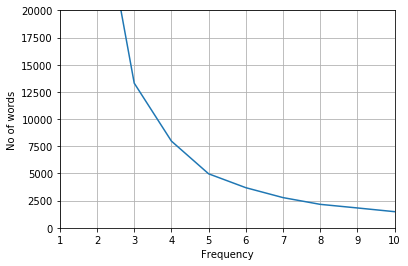

In [6]:
#In latin1 each character is exactly one byte long. In utf8 a character can consist of more than one byte. 
#Consequently utf8 has more characters than latin1 (and the characters they do have in common aren't necessarily represented by the same byte/bytesequence).
#difference Between latin-1 anf uft-8
# plotting a graph
num_words=[0 for i in range(max(dictionary.values())+1)]
freq = [i for i in range(max(dictionary.values())+1)] 
for key in dictionary:
    num_words[dictionary[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [7]:
cutoff_freq=80
num_words_above_cutoff=len(dictionary)-sum(num_words[0:cutoff_freq])
num_words_above_cutoff

4067

In [8]:
#features are chosen those words that are above frequency
features=[]
for key in dictionary:
    if dictionary[key]>=cutoff_freq:
        features.append(key)

In [9]:
x_train_dataset=np.zeros((len(x_train),len(features)))
for i in range(len(x_train)):
    word_list=[word.decode('latin-1').strip(string.punctuation).lower() for word in x_train[i][1].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)]+=1


In [10]:
x_test_dataset=np.zeros((len(x_test),len(features)))
for i in range(len(x_test)):
    word_list=[word.decode('latin-1').strip(string.punctuation).lower() for word in x_test[i][1].split()]
    for word in word_list:
        if word in features:
            x_test_dataset[i][features.index(word)]+=1

In [11]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
y_test_pred=clf.predict(x_test_dataset)

In [13]:
print(clf.score(x_train_dataset,y_train))
print(clf.score(x_test_dataset,y_test))

0.9035807161432287
0.872
1.0


In [14]:
print(classification_report(y_test,y_test_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.81      0.77       240
           comp.graphics       0.81      0.80      0.81       244
 comp.os.ms-windows.misc       0.85      0.87      0.86       240
comp.sys.ibm.pc.hardware       0.87      0.85      0.86       256
   comp.sys.mac.hardware       0.87      0.91      0.89       249
          comp.windows.x       0.93      0.89      0.91       233
            misc.forsale       0.79      0.91      0.85       259
               rec.autos       0.90      0.94      0.92       253
         rec.motorcycles       0.91      0.96      0.94       231
      rec.sport.baseball       0.98      0.97      0.98       236
        rec.sport.hockey       0.99      0.98      0.99       261
               sci.crypt       0.94      0.93      0.93       269
         sci.electronics       0.87      0.89      0.88       246
                 sci.med       0.98      0.90      0.94       284
         